In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the ECG datasets (ST and AFib) as CSV files into Pandas DataFrames.
st_ecg_data = pd.read_csv('NSR.csv')
afib_ecg_data = pd.read_csv('AF.csv')

# Select all columns with the name 'Lead2' from each dataset.
st_lead2 = st_ecg_data.filter(like='Lead2')
afib_lead2 = afib_ecg_data.filter(like='Lead2')

# Transpose the DataFrames to have each row represent one ECG data point.
st_lead2 = st_lead2.T
afib_lead2 = afib_lead2.T

# Label the data as before.
st_lead2['8003'] = '0'
afib_lead2['8003'] = '1'

# Combine the datasets into a single DataFrame.
ecg_data = pd.concat([st_lead2, afib_lead2])

# Split the data into training and test DataFrames.
train_df, temp_df = train_test_split(ecg_data, test_size=0.4, random_state=42)
validation_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [2]:
train_df = train_df.reset_index(drop=True)
validation_df = validation_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)


In [3]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,7994,7995,7996,7997,7998,7999,8000,8001,8002,8003
0,0.195945,0.614280,-1.289731,-10.657879,-27.617260,-42.741580,-47.198548,-43.933919,-42.497546,-46.120974,...,-1.593890e-278,4.001308e-279,1.162656e-278,3.345685e-279,-5.374081e-279,-4.689240e-279,9.253550e-280,3.295649e-279,1.074705e-279,0
1,0.804404,6.472699,23.694557,52.471898,79.227330,88.480901,80.861176,71.438469,71.261333,77.508545,...,-9.212461e-279,2.282145e-279,6.704837e-279,1.944728e-279,-3.091537e-279,-2.709706e-279,5.263079e-280,1.900238e-279,6.240454e-280,0
2,0.216570,2.041326,8.597470,21.810359,38.017916,49.468572,51.261769,44.872981,35.149057,25.964517,...,2.596098e-278,-9.517695e-280,-1.617690e-278,-7.447237e-279,6.092588e-279,7.526785e-279,4.728227e-281,-4.529813e-279,-2.275182e-279,0
3,0.928159,13.704615,72.145927,205.250211,370.619026,465.652764,444.773203,375.259005,346.859200,372.273159,...,1.241687e-278,-2.731592e-278,-2.105892e-278,6.080268e-279,1.575494e-278,4.135525e-279,-7.479785e-279,-6.211380e-279,1.444271e-279,0
4,-0.752840,-3.657924,-4.887841,6.928777,34.523001,59.657133,63.162153,49.582901,38.630921,39.839583,...,-4.977809e-278,-3.529124e-278,1.260999e-278,2.760310e-278,6.061572e-279,-1.369199e-278,-1.045750e-278,3.096414e-279,7.861849e-279,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,0.340325,1.765470,3.158156,0.613578,-6.593011,-12.414441,-12.025418,-8.543237,-7.596718,-10.169540,...,-1.043712e-278,4.436268e-279,8.514031e-279,1.538887e-279,-4.387271e-279,-3.106821e-279,1.113200e-279,2.431541e-279,5.325118e-280,0
427,-0.319699,-2.710385,-10.391855,-23.931743,-37.206346,-42.103225,-37.965560,-32.171989,-31.004182,-33.635314,...,-2.078673e-278,1.154039e-279,1.314710e-278,5.822233e-279,-5.065663e-279,-6.034446e-279,7.162047e-281,3.686006e-279,1.784763e-279,0
428,-0.082503,-0.572373,-1.788986,-3.382299,-4.438630,-4.494746,-3.940839,-3.428736,-3.286589,-3.444547,...,-2.834840e-279,-7.635889e-280,1.336207e-279,1.124624e-279,-2.505648e-280,-8.045999e-280,-2.474676e-280,3.640030e-280,3.302322e-280,0
429,0.567208,4.974086,19.594612,46.036865,72.451005,82.222003,73.461041,60.944390,57.614072,62.046698,...,2.708101e-278,-8.617079e-279,-2.065609e-278,-5.031648e-279,1.000026e-278,8.003520e-279,-2.080189e-279,-5.873337e-279,-1.654514e-279,0


In [4]:
train_x = train_df.iloc[:, :-1]
train_y = train_df.iloc[:, -1]
X_val=validation_df.iloc[:,:-1]
y_val=validation_df.iloc[:,-1]
X_test=test_df.iloc[:, :-1]
y_test=test_df.iloc[:, -1]


In [5]:
train_x


,0,1,2,3,4,5,6,7,8,9,...,7993,7994,7995,7996,7997,7998,7999,8000,8001,8002
0,0.195945,0.614280,-1.289731,-10.657879,-27.617260,-42.741580,-47.198548,-43.933919,-42.497546,-46.120974,...,-1.968170e-278,-1.593890e-278,4.001308e-279,1.162656e-278,3.345685e-279,-5.374081e-279,-4.689240e-279,9.253550e-280,3.295649e-279,1.074705e-279
1,0.804404,6.472699,23.694557,52.471898,79.227330,88.480901,80.861176,71.438469,71.261333,77.508545,...,-1.132524e-278,-9.212461e-279,2.282145e-279,6.704837e-279,1.944728e-279,-3.091537e-279,-2.709706e-279,5.263079e-280,1.900238e-279,6.240454e-280
2,0.216570,2.041326,8.597470,21.810359,38.017916,49.468572,51.261769,44.872981,35.149057,25.964517,...,2.285714e-278,2.596098e-278,-9.517695e-280,-1.617690e-278,-7.447237e-279,6.092588e-279,7.526785e-279,4.728227e-281,-4.529813e-279,-2.275182e-279
3,0.928159,13.704615,72.145927,205.250211,370.619026,465.652764,444.773203,375.259005,346.859200,372.273159,...,5.533450e-278,1.241687e-278,-2.731592e-278,-2.105892e-278,6.080268e-279,1.575494e-278,4.135525e-279,-7.479785e-279,-6.211380e-279,1.444271e-279
4,-0.752840,-3.657924,-4.887841,6.928777,34.523001,59.657133,63.162153,49.582901,38.630921,39.839583,...,1.752830e-278,-4.977809e-278,-3.529124e-278,1.260999e-278,2.760310e-278,6.061572e-279,-1.369199e-278,-1.045750e-278,3.096414e-279,7.861849e-279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,0.340325,1.765470,3.158156,0.613578,-6.593011,-12.414441,-12.025418,-8.543237,-7.596718,-10.169540,...,-1.589014e-278,-1.043712e-278,4.436268e-279,8.514031e-279,1.538887e-279,-4.387271e-279,-3.106821e-279,1.113200e-279,2.431541e-279,5.325118e-280
427,-0.319699,-2.710385,-10.391855,-23.931743,-37.206346,-42.103225,-37.965560,-32.171989,-31.004182,-33.635314,...,-1.894945e-278,-2.078673e-278,1.154039e-279,1.314710e-278,5.822233e-279,-5.065663e-279,-6.034446e-279,7.162047e-281,3.686006e-279,1.784763e-279
428,-0.082503,-0.572373,-1.788986,-3.382299,-4.438630,-4.494746,-3.940839,-3.428736,-3.286589,-3.444547,...,-1.061858e-279,-2.834840e-279,-7.635889e-280,1.336207e-279,1.124624e-279,-2.505648e-280,-8.045999e-280,-2.474676e-280,3.640030e-280,3.302322e-280
429,0.567208,4.974086,19.594612,46.036865,72.451005,82.222003,73.461041,60.944390,57.614072,62.046698,...,3.644654e-278,2.708101e-278,-8.617079e-279,-2.065609e-278,-5.031648e-279,1.000026e-278,8.003520e-279,-2.080189e-279,-5.873337e-279,-1.654514e-279


In [6]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(sampling_strategy={'0': 392, '1': 392})
x_train_smote, train_y = smote.fit_resample(train_x, train_y)
percentSmote = train_y.value_counts()
print(percentSmote)
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy={'0': 133, '1': 133})
x_val_smote, val_y= smote.fit_resample(X_val, y_val)
percentSmot = val_y.value_counts()
print(percentSmot)
smote = SMOTE(sampling_strategy={'0': 135, '1': 135})
x_test_smote, test_y = smote.fit_resample(X_test, y_test)
percentSmo = test_y.value_counts()
print(percentSmo)


0    392
1    392
Name: 8003, dtype: int64
0    133
1    133
Name: 8003, dtype: int64
0    135
1    135
Name: 8003, dtype: int64


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical


# Convert DataFrames to NumPy arrays before reshaping
train_X = np.array(x_train_smote).reshape((x_train_smote.shape[0], x_train_smote.shape[1], 1))
val_X = np.array(x_val_smote).reshape((x_val_smote.shape[0], x_val_smote.shape[1], 1))
test_X = np.array(x_test_smote).reshape((x_test_smote.shape[0], x_test_smote.shape[1], 1))


# Standardize the data
scaler = StandardScaler()
train_X = scaler.fit_transform(x_train_smote)
val_X = scaler.transform(x_val_smote)
test_X = scaler.transform(x_test_smote)

# Convert DataFrames to NumPy arrays before reshaping
train_X = np.array(x_train_smote).reshape((x_train_smote.shape[0], x_train_smote.shape[1], 1))
val_X = np.array(x_val_smote).reshape((x_val_smote.shape[0], x_val_smote.shape[1], 1))
test_X = np.array(x_test_smote).reshape((x_test_smote.shape[0], x_test_smote.shape[1], 1))


train_y = to_categorical(train_y, num_classes=2)
val_y = to_categorical(val_y, num_classes=2)
test_y = to_categorical(test_y, num_classes=2)
# Build the CNN model
#model = Sequential()
#model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(train_X.shape[1], 1)))
#model.add(MaxPooling1D(pool_size=2))
#model.add(Flatten())
#model.add(Dense(64, activation='relu'))
#model.add(Dense(2, activation='softmax'))  # Assuming 2 classes (SR and AF)

# Compile the model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
#model.fit(train_X, train_y, epochs=20, batch_size=64, validation_data=(val_X, val_y))

# Evaluate the model on the test set
#accuracy = model.evaluate(test_X, test_y)[1]
#print(f'Test Accuracy: {accuracy}')#



In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# Assuming your data is 1D

# Assuming you have loaded train_X, train_y, val_X, val_y, test_X, test_y
class_weights = {0: 1.0, 1: 5.0} 
model = Sequential()

# Assuming your data is 1D
im_shape = (train_X.shape[1], 1)

# Block 1
model.add(Conv1D(64, kernel_size=6, activation='relu', input_shape=im_shape))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=6, strides=6, padding="same"))
model.add(Dropout(0.2))

# Block 2
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=3, padding="same"))
model.add(Dropout(0.2))

# Block 3
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=3, padding="same"))
model.add(Dropout(0.2))

# Block 4
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=3, padding="same"))
model.add(Dropout(0.2))

# Block 5
model.add(Conv1D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=3, padding="same"))
model.add(Dropout(0.2))

# Block 6
model.add(Conv1D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=3, padding="same"))
model.add(Dropout(0.2))

# Block 7
model.add(Conv1D(512, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=3, padding="same"))
model.add(Dropout(0.2))

# Block 8
# Block 8
model.add(Conv1D(512, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=3, padding="same"))
model.add(Dropout(0.2))

# Block 9
# Block 9
model.add(Conv1D(1024, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=3, padding="same"))
model.add(Dropout(0.2))

# Block 10
model.add(Conv1D(1024, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=3, padding="same"))
model.add(Dropout(0.2))

# Flatten layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Assuming you have an EarlyStopping callback defined
early_stopping = EarlyStopping(monitor='val_loss', patience=8)
# Assuming you have a ModelCheckpoint callback defined
model_checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

callbacks = [early_stopping, model_checkpoint]

# Assuming your data has the same format as the example
# Assuming your data has the same format as the example
history = model.fit(
    train_X,
    train_y,  # Assuming train_y is a 1D array with values 0 or 1
    epochs=40,
    callbacks=callbacks,
    batch_size=64,
    validation_data=(val_X, val_y),  # Assuming val_y is a 1D array with values 0 or 1
    class_weight=class_weights  # Pass the class weights here
)
# Evaluate the model on the test set
accuracy = model.evaluate(test_X, test_y)[1]
print(f'Test Accuracy: {accuracy}')


Epoch 1/40
13/13 [==============================] - ETA: 0s - loss: 1.3337 - accuracy: 0.5089

C:\Users\rezag\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - 51s 3s/step - loss: 1.3337 - accuracy: 0.5089 - val_loss: 0.6986 - val_accuracy: 0.5038
Epoch 2/40
13/13 [==============================] - 39s 3s/step - loss: 1.1759 - accuracy: 0.6033 - val_loss: 0.7645 - val_accuracy: 0.5000
Epoch 3/40
13/13 [==============================] - 38s 3s/step - loss: 1.0590 - accuracy: 0.6224 - val_loss: 0.7246 - val_accuracy: 0.5414
Epoch 4/40
13/13 [==============================] - 43s 3s/step - loss: 0.9913 - accuracy: 0.6747 - val_loss: 0.6843 - val_accuracy: 0.5602
Epoch 5/40
13/13 [==============================] - 40s 3s/step - loss: 0.9342 - accuracy: 0.6212 - val_loss: 0.6538 - val_accuracy: 0.6241
Epoch 6/40
13/13 [==============================] - 38s 3s/step - loss: 0.8766 - accuracy: 0.7347 - val_loss: 0.7224 - val_accuracy: 0.5677
Epoch 7/40
13/13 [==============================] - 39s 3s/step - loss: 0.8667 - accuracy: 0.7283 - val_loss: 0.6718 - val_accuracy: 0.5902
Epoch 8/40
13/13 [=============

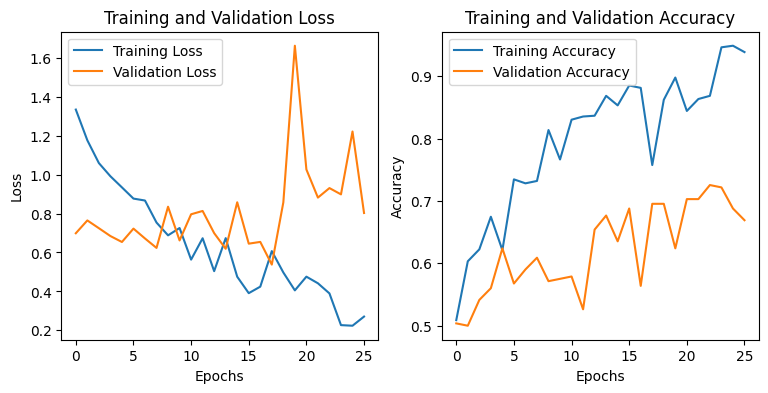

In [18]:
import matplotlib.pyplot as plt

# Assuming you have trained the model and have the 'history' object
# history = model.fit(...)

# Plot training and validation loss
plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


9/9 [==============================] - 2s 124ms/step


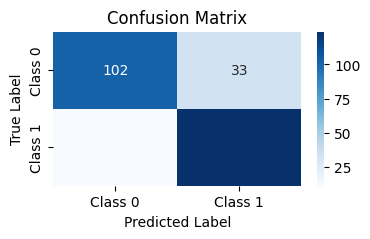

True Positives (TP): 124
True Negatives (TN): 102
False Positives (FP): 33
False Negatives (FN): 11
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.82       135
           1       0.79      0.92      0.85       135

    accuracy                           0.84       270
   macro avg       0.85      0.84      0.84       270
weighted avg       0.85      0.84      0.84       270

Accuracy: 0.837037037037037


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assuming you have predictions for the test set
y_pred = model.predict(test_X)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_y, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
cm = confusion_matrix(y_true, y_pred_classes) 
# Extract TP, TN, FP, FN from the confusion matrix
tn, fp, fn, tp = cm.ravel()
print(f'True Positives (TP): {tp}')
print(f'True Negatives (TN): {tn}')
print(f'False Positives (FP): {fp}')
print(f'False Negatives (FN): {fn}')
# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

# Accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy}")

# You can also calculate and print precision, recall, and F1-score separately if needed


9/9 [==============================] - 1s 124ms/step


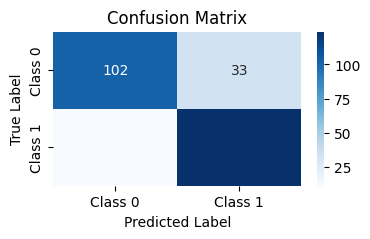

True Positives (TP): 124
True Negatives (TN): 102
False Positives (FP): 33
False Negatives (FN): 11
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.82       135
           1       0.79      0.92      0.85       135

    accuracy                           0.84       270
   macro avg       0.85      0.84      0.84       270
weighted avg       0.85      0.84      0.84       270

Accuracy: 0.837037037037037


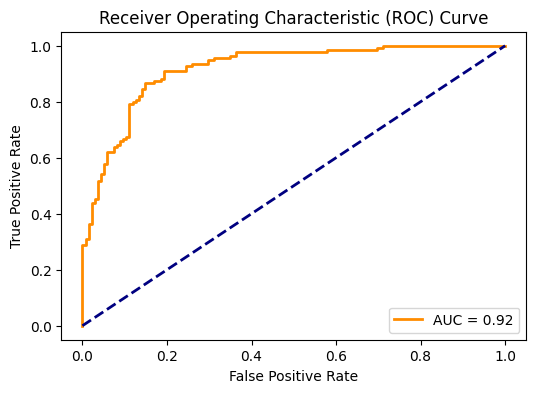

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

# Assuming you have predictions for the test set
y_pred = model.predict(test_X)

# Convert predicted probabilities to class labels using a threshold (e.g., 0.5 for binary classification)
threshold = 0.5
y_pred_classes = (y_pred[:, 1] > threshold).astype(int)

# Convert true labels to class labels
y_true = test_y.argmax(axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Extract TP, TN, FP, FN from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
print(f'True Positives (TP): {tp}')
print(f'True Negatives (TN): {tn}')
print(f'False Positives (FP): {fp}')
print(f'False Negatives (FN): {fn}')

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

# Accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1))

# Calculate metrics
accuracy = accuracy_score(test_y.argmax(axis=1), y_pred.argmax(axis=1))
precision = precision_score(test_y.argmax(axis=1), y_pred.argmax(axis=1))
recall = recall_score(test_y.argmax(axis=1), y_pred.argmax(axis=1))
f1 = f1_score(test_y.argmax(axis=1), y_pred.argmax(axis=1))

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall (Sensitivity): {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8370
Precision: 0.7898
Recall (Sensitivity): 0.9185
F1 Score: 0.8493


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from deap import base, creator, tools, algorithms
import random
import tensorflow as tf

# Assuming your data is 1D
# Assuming you have loaded train_X, train_y, val_X, val_y, test_X, test_y
class_weights = {0: 1.0, 1: 5.0}

# Assuming your data is 1D
im_shape = (train_X.shape[1], 1)

# Assuming you have an EarlyStopping callback defined
early_stopping = EarlyStopping(monitor='val_loss', patience=8)
# Assuming you have a ModelCheckpoint callback defined
model_checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)
callbacks = [early_stopping, model_checkpoint]

def build_model(filters, kernel_sizes, dropout_rates):
    model = Sequential()
    for i in range(len(filters)):
        model.add(Conv1D(filters[i], kernel_size=kernel_sizes[i], activation='relu', padding='same', input_shape=im_shape))
        model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=3, strides=3, padding="same"))
        model.add(Dropout(dropout_rates[i]))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define the fitness function
def fitness_function(individual):
    filters = individual[:10]
    kernel_sizes = individual[10:20]
    dropout_rates = individual[20:]

    # Reset the states of the model before each call to fit
    model.reset_states()

    # Train the model
    history = model.fit(
        train_X,
        train_y,
        epochs=40,
        callbacks=callbacks,
        batch_size=64,
        validation_data=(val_X, val_y),
        class_weight=class_weights
    )

    # Evaluate the model on the validation set
    accuracy = model.evaluate(val_X, val_y)[1]

    # Return the negative accuracy as deap minimizes the objective function
    return -accuracy,

def init_individual():
    choices = [64, 128, 256, 512, 1024]
    filters = [random.choice(choices) for _ in range(10)]
    kernel_sizes = [random.choice([3, 6]) for _ in range(10)]
    dropout_rates = [random.uniform(0.0, 1.0) for _ in range(10)]
    
    return filters + kernel_sizes + dropout_rates

# Create the genetic algorithm
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, init_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", fitness_function)

# Number of individuals in the population
population_size = 10
# Number of generations
generations = 5

# Create the population
population = toolbox.population(n=population_size)

# Build and compile the model outside the loop
model = build_model([], [], [])  # Initial empty values
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Genetic Algorithm
for gen in range(generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
        # Stop if a perfect solution is found
        if fit[0] == -1.0:
            print(f"Perfect solution found. Stopping the genetic algorithm at generation {gen + 1}.")
            break
    population = toolbox.select(offspring, k=len(population))

    # Check if a perfect solution is found
    if any(fit[0] == -1.0 for fit in fits):
        break

# Get the best individual
best_ind = tools.selBest(population, k=1)[0]

# Print the best individual and its fitness value
print("Best Individual:", best_ind)
print("Best Fitness:", best_ind.fitness.values[0])

# Reset the states of the model
model.reset_states()

# Train the final model
final_history = model.fit(
    train_X,
    train_y,
    epochs=40,
    callbacks=callbacks,
    batch_size=64,
    validation_data=(val_X, val_y),
    class_weight=class_weights
)

# Evaluate the final model on the test set
test_accuracy = model.evaluate(test_X, test_y)[1]
print(f'Test Accuracy: {test_accuracy}')


Epoch 1/40
13/13 [==============================] - 3s 132ms/step - loss: 78.3214 - accuracy: 0.7156 - val_loss: 79.6737 - val_accuracy: 0.4812
Epoch 2/40
13/13 [==============================] - 1s 76ms/step - loss: 20.4052 - accuracy: 0.9069 - val_loss: 194.4048 - val_accuracy: 0.5038
Epoch 3/40
13/13 [==============================] - 1s 76ms/step - loss: 9.5216 - accuracy: 0.9515 - val_loss: 296.9835 - val_accuracy: 0.5000
Epoch 4/40
13/13 [==============================] - 1s 77ms/step - loss: 13.4119 - accuracy: 0.9630 - val_loss: 288.7480 - val_accuracy: 0.4887
Epoch 5/40
13/13 [==============================] - 1s 82ms/step - loss: 0.4855 - accuracy: 0.9974 - val_loss: 354.0237 - val_accuracy: 0.5000
Epoch 6/40
13/13 [==============================] - 1s 75ms/step - loss: 0.2551 - accuracy: 0.9974 - val_loss: 321.2520 - val_accuracy: 0.4812
Epoch 7/40
13/13 [==============================] - 1s 75ms/step - loss: 0.1913 - accuracy: 1.0000 - val_loss: 320.2428 - val_accuracy: 0.4

KeyboardInterrupt: 